In [148]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import altair as alt
from scipy.stats import poisson
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gamma
import statsmodels.api as sm
from scipy.stats import poisson

## Question 1

In [153]:
# Part A
data = pd.read_csv('question1.csv', index_col = 0)
first = data[0:200]
second = data[200:]


# Part B
lin_model = LinearRegression()
lin_model.fit(first[['customers']], first['sales'])
print(lin_model.coef_[0])
print(lin_model.intercept_)

# Part C
lamda_mle = first.customers.mean()

x_values = np.arange(0, np.max(first['customers']) + 1)
pmf_values_mle = poisson.pmf(x_values, lamda_mle)

vals = pd.DataFrame(pmf_values_mle, columns=['values'])
vals['x'] = pd.Series(x_values)

df = pd.DataFrame(first['customers'].value_counts(normalize=True)).reset_index()

hist = alt.Chart(df).mark_bar().encode(
    x=alt.X('customers:Q', title = '# of Customers'),
    y = alt.Y('proportion:Q', title='Density'))

pmf = alt.Chart(vals).mark_line(color='red').encode(
    x='x:Q',
    y ='values:Q')

display(hist + pmf)

log_likelihood_mle = np.sum(np.log(poisson.pmf(second['customers'], mu=lamda_mle)))
log_likelihood_actual = np.sum(np.log(poisson.pmf(second['customers'], mu=second['customers'].mean())))

log_RL = log_likelihood_mle - log_likelihood_actual
test_stat = -2 * log_RL
print('Test statistics:', test_stat)
p_value = 1 - chi2(df=1).cdf(test_stat)
print('P-value:', p_value)
print("""P-value is less than the 0.05 significance level so the null hypothesis can be rejected and this shows in the last 200 days the 
data has drifted.""")

# Part D
y_pred = lin_model.predict(first[['customers']])
mse = mean_squared_error(first['sales'], y_pred)
print('First 200 MSE:',mse)

y_pred = lin_model.predict(second[['customers']])
mse = mean_squared_error(second['sales'], y_pred)
print('Second 200 MSE:',mse)

df2 = second
df2 = df2.reset_index(drop=True)
df2['pred'] = pd.Series(y_pred)

scatter = alt.Chart(df2).mark_circle().encode(
    x=alt.X('customers:Q', scale=alt.Scale(zero=False), title='# of Customers'),
    y=alt.Y('sales:Q', scale=alt.Scale(zero=False), title='Sales'))

line = scatter.mark_line(color='red').encode(
    y='pred:Q')

display(scatter + line)

print("""The MSE is very high for the second 200 days when compared to the first 200 indicating the regression line found using the data 
from the first 200 days does not fit the data from the last 200 days very well. Furthermore, it can be seen from the plot
the regression line does not fit the last 200 days data very well, it is much lower than the trending data which reinforces the conclusion from
Part C - the data in the last 200 days has drifted compared to data in the first 200 days.""")


38.441653524343714
1427.6331139924964


alt.LayerChart(...)

Test statistics: 187.556593718572
P-value: 0.0
P-value is less than the 0.05 significance level so the null hypothesis can be rejected and this shows in the last 200 days the 
data has drifted.
First 200 MSE: 93693.47481903991
Second 200 MSE: 456977.73865779967


alt.LayerChart(...)

The MSE is very high for the second 200 days when compared to the first 200 indicating the regression line found using the data 
from the first 200 days does not fit the data from the last 200 days very well. Furthermore, it can be seen from the plot
the regression line does not fit the last 200 days data very well, it is much lower than the trending data which reinforces the conclusion from
Part C - the data in the last 200 days has drifted compared to data in the first 200 days.


## Question 2

In [149]:
# Part 1
data = pd.read_csv('question2.csv', index_col = 0)
wool_dummies = pd.get_dummies(data['wool'], dtype=int)
tension_dummies = pd.get_dummies(data['tension'], dtype=int)

x = pd.concat([wool_dummies,tension_dummies, data['temperature']], axis=1)
x.head()

# Part 2
model = sm.GLM(data['breaks'], x, family=sm.families.Poisson())
result = model.fit()
print(result.summary())
print('')
print("""The p-value for the temperature is very high indicating the relationship is not significant between breakages and 
temperature - therefore temperature does not have an affect on the breakage.""")
print('')
print('')

# Part 3
# make 2 glm model based on tension_dummies or wool_dummies
model_wool = sm.GLM(data['breaks'], x.loc[:,'A':'B'], family=sm.families.Poisson())
result_wool = model_wool.fit()
print(result_wool.summary())

model_tension = sm.GLM(data['breaks'], x.loc[:,'H':'M'], family=sm.families.Poisson())
result_tension = model_tension.fit()
print(result_tension.summary())

print("""The model created for just tension has a higher pseudo R-squared values of 0.7312 which is able to explaing 
the variation in the response more than the model considering just wool. Both models fail short to the overall model which considers both
tension, wool, and temperature - which has an R-squared value of 0.8.""")
## (MSE, R^2, etc)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 breaks   No. Observations:                   54
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -242.51
Date:                Thu, 15 Feb 2024   Deviance:                       210.36
Time:                        15:16:31   Pearson chi2:                     213.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8004
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
A               2.0561      0.176     11.687      

## Question 3

actual_operating_location
NE OR 01    1.593981
NE OR 02    1.583951
NE OR 03    1.391837
NE OR 04    1.423767
NE OR 05    1.593981
NE OR 06    1.583951
NE OR 07    1.391837
NE OR 08    1.423767
Name: duration, dtype: float64
 
procedure_specialty
GYNECOLOGY    1.394444
ORTHOPEDIC    1.612073
PLASTIC       1.344438
Name: duration, dtype: float64
 
surgeon_identifier
 Carrie, Cunningham MD    1.191539
 Samantha, Mahoney MD     2.204545
Adams, Mark MD            1.119697
Allen, Henry MD           1.449471
Brown, Cassandra MD       1.394444
Choi, Ian MD              1.502340
Diaz, David MD            1.471299
Ellis, Stephanie MD       1.502340
Fernandez, Cynthia MD     1.355400
Flores, Martin MD         1.791667
Garcia, Sara MD           2.204545
Good, Kristopher MD       1.422678
Hester, Duane MD          1.830303
Howell, Deborah MD        1.893011
Jackson, Barbara MD       1.354563
Jackson, Michele MD       1.484918
Kelly, James MD           1.191539
Larson, Stephen MD        2.220958
Le

/tmp/ipykernel_1073/2923553657.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['duration'] = (pd.to_datetime(data['pt_out_room_time']) - pd.to_datetime(data['pt_in_room_time'])).dt.seconds/3600
/tmp/ipykernel_1073/2923553657.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['duration'] = (pd.to_datetime(data['pt_out_room_time']) - pd.to_datetime(data['pt_in_room_time'])).dt.seconds/3600


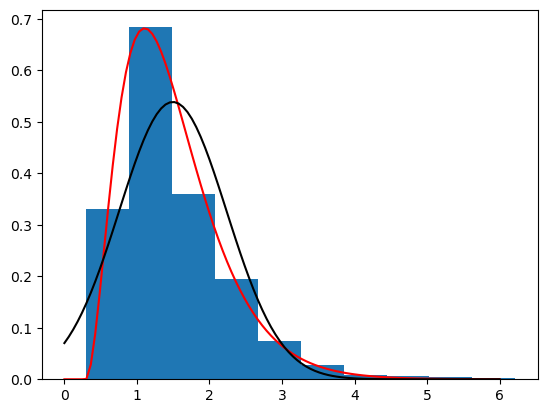

/home/dhun97/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


I think the gamma distribution is approriate because it measures the time before k 
events occur in a poisson process - here k events is time until 1 surgery is done - and based on the plot it seems to match the histogram
well. The normal distribution also fits well however we must consider the bounds
as the distribution is defined from -infinity to +infinity but duration cannot be negative so we must define the bounds greater than 0.


                 Generalized Linear Model Regression Results                  
Dep. Variable:               duration   No. Observations:                 4036
Model:                            GLM   Df Residuals:                     3823
Model Family:                   Gamma   Df Model:                          212
Link Function:           InversePower   Scale:                        0.071641
Method:                          IRLS   Log-Likelihood:                -1296.7
Date:                Thu, 15 Feb 2024   Deviance:                       240.81
Time: 

In [154]:
# Part 1
data = pd.read_csv('question3.csv')

data['duration'] = (pd.to_datetime(data['pt_out_room_time']) - pd.to_datetime(data['pt_in_room_time'])).dt.seconds/3600

print(data.groupby('actual_operating_location')['duration'].mean())
print(' ')
print(data.groupby('procedure_specialty')['duration'].mean())
print(' ')
print(data.groupby('surgeon_identifier')['duration'].mean())
print(' ')
print(data.groupby('procedure_identifier')['duration'].mean())
print(' ')

print("""Based on the findings I think surgeon_identifier and procedure_identifier are the most meaningful to predict duration because they show the
most variation in the means, where as the other columns the average durations are very similar.""")

# Part 2

mu, std = norm.fit(data['duration'])
shape, loc, scale = gamma.fit(data['duration'])

xmin = 0
xmax = 6
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
z = gamma.pdf(x, shape, loc, scale)
plt.plot(x, z, 'r')
plt.plot(x, p, 'k')

plt.hist(data['duration'], density=True)
plt.show()

print("""I think the gamma distribution is approriate because it measures the time before k 
events occur in a poisson process - here k events is time until 1 surgery is done - and based on the plot it seems to match the histogram
well. The normal distribution also fits well however we must consider the bounds
as the distribution is defined from -infinity to +infinity but duration cannot be negative so we must define the bounds greater than 0.""")

print('')
print('')

# Part 3
surg_dummies = pd.get_dummies(data['surgeon_identifier'], dtype=int)
proc_dummies = pd.get_dummies(data['procedure_identifier'], dtype=int)
df_concat = pd.concat([surg_dummies,proc_dummies], axis=1)

model = sm.GLM(data['duration'], df_concat, family=sm.families.Gamma())
result = model.fit()
print(result.summary().tables[0])


print("""The value of using a distribution over a mean is beneficial because it can account for exterme situations where for a 
particular surgeon even if the mean time is about 2 hours, what would happen in cases if the duration is 1 hour or 4 hours - the 
model based on the distribution is able to handle such instances but the the means would not. Look at the below as an example:
""")

print(data.groupby('surgeon_identifier')['duration'].mean())
print(' ')

print("For Garcia, Sara, her average duration is 2.20 hours, but her max is almost double that while her min is half that.")

max = data.query('surgeon_identifier == "Garcia, Sara MD"')['duration'].max()
min = data.query('surgeon_identifier == "Garcia, Sara MD"')['duration'].min()
print("Max time for Sara:", max)
print("Min time for Sara:", min)

print(' ')
print("""Finally, the GLM fit is reasonably good because based on the pseudo R-squared value of 0.8747, it shows the model is able to capture majority
of the variation in duration with those 2 predictors.""")